<a href="https://colab.research.google.com/github/kumaran-404/Air_canvas/blob/main/Air_Writing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
from keras.datasets import mnist
import numpy as np 
import keras 
import cv2 

In [11]:
eight = []

*Sample Image Augmentation for Digit 8*

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from numpy import expand_dims 
from PIL import Image
import numpy as np 

image1 = Image.open('/content/8_1.png')
image2 =Image.open('/content/8_2.png')
image3 = Image.open('/content/8_3.png')


datagen = ImageDataGenerator(brightness_range=[0.2,1.0],rotation_range=45,zoom_range=[0.5,1.0])

data1 = np.asarray(image1)
data2 = np.asarray(image2)
data3 = np.asarray(image3)

k = []
k.append(data1)
k.append(data2)
k.append(data3)

k = np.array(k)
#samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
# prepare iterator
a = ""
count = 0 
it = datagen.flow(k, batch_size=3)
# generate samples and plot
for i in range(1200):
  print(count) 
  count+=1 
  batch = it.next()
  image = batch[0].astype('uint8')
  a  =image[:,:,0]
  a = a.reshape(296*196,)
  eight.append(a)
  
  # show the figure

eight= np.array(eight)



Loading saved Numpy Image array from google drive

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import numpy as np

a = np.load("/content/drive/MyDrive/1234.npz")
a = a["arr_0"]
b = np.load("/content/drive/MyDrive/5678.npz")
b = b["arr_0"]
c = np.concatenate((a,b))




Sample Image from datset

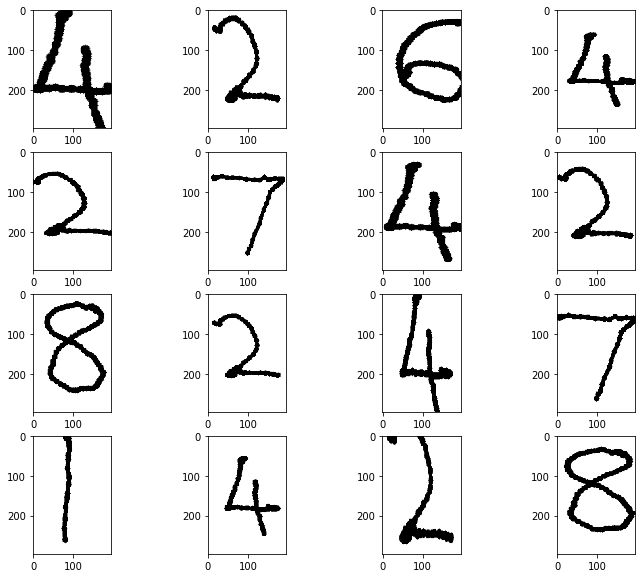

In [8]:
from matplotlib import pyplot as plt 
import random 
plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(c[random.randint(0,9600)].reshape((296,196)),interpolation='nearest', cmap='Greys')
plt.show()


 **Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model, Input


input_layer = Input(shape=((58016,)), name='input') # 3 dimensional input
hidden_layer1 = Dense(units=2000, activation="sigmoid", name="hidden_layer1")(input_layer)
hidden_layer2 = Dense(units=2000, activation="sigmoid", name="hidden_layer2")(hidden_layer1)
output_layer = Dense(units=8, activation="sigmoid", name="output_layer")(hidden_layer2)


# Create the model
model = Model(input_layer, output_layer)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [3]:
k=[]
for i in range(0,8):
  for j in range(1200):
    k.append(i)

k= np.array(k)
k.shape

(9600,)

In [6]:
#model training
model.fit(c,k,epochs=5)

Epoch 1/5
300/300 [==============================] - 309s 1s/step - loss: 0.5893 - accuracy: 0.7821
Epoch 2/5
300/300 [==============================] - 307s 1s/step - loss: 0.1947 - accuracy: 0.8737
Epoch 3/5
300/300 [==============================] - 310s 1s/step - loss: 0.1875 - accuracy: 0.8775
Epoch 4/5
300/300 [==============================] - 306s 1s/step - loss: 0.1824 - accuracy: 0.8749
Epoch 5/5
300/300 [==============================] - 315s 1s/step - loss: 0.1827 - accuracy: 0.8746


In [8]:
#saving model locally
model.save("final_model_done")

In [10]:
#saving to g-drive
!cp -r "/content/final_model_done" "/content/drive/MyDrive/final_model_done"

In [ ]:
#calculating accuracy
model.evaluate(c,k)

300/300 [==============================] - 66s 219ms/step - loss: 0.1747 - accuracy: 0.8750


[0.17465274035930634, 0.875]

g-drive model link : 
https://drive.google.com/drive/folders/1bFhj-bEaJPS9dK3vMWmLzd8TDyltaCmc?usp=sharing